In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glovetwitter27b100dtxt/glove.twitter.27B.100d.txt
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf


Using TensorFlow backend.


In [3]:
true = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
fake = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")

In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true['category']=1
fake['category']=0

In [7]:
true.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
fake.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
df = pd.concat([true ,fake])

In [10]:
df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


(array([23481.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 21417.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

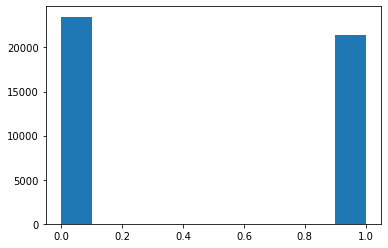

In [11]:
plt.hist(df['category'])

In [12]:
df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [13]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [14]:
import random
df['text']=df['text']+ " "+ df['title']
choice_f=['text','category']
dataset=df[choice_f]
#random shuffle
dataset= dataset.sample(frac=1).reset_index(drop=True)

In [15]:
dataset.head()

,text,category
0,You may not be familiar with the name Unileve...,0
1,If you live in Wisconsin and want your working...,0
2,LONDON (Reuters) - Iranian state television br...,1
3,HARARE (Reuters) - Zimbabwean President Emmers...,1
4,Americans should pay close attention to this s...,0


In [16]:
dataset.text[2]

"LONDON (Reuters) - Iranian state television broadcast on Sunday what it described as the confessions of an Iranian academic with Swedish residency who it said had provided information to Israel to help it assassinate several senior nuclear scientists.  His wife, speaking by telephone from Stockholm, said he had been forced by his interrogators to read the confession. Iran s Supreme Court upheld last week a death sentence against Ahmadreza Djalali, a doctor and lecturer at the Karolinska Institute, a Stockholm medical university. Djalali was arrested in Iran in April 2016 and later convicted of espionage. He denied the charges. In the television report, Djalali was linked to the assassination of four Iranian scientists between 2010 and 2012 that Tehran said was an Israeli attempt to sabotage its nuclear energy program.  Djalali said in the report that he had given the Israeli intelligence agency Mossad information about key nuclear scientists.  They were showing me pictures of some peo

In [17]:
stop= set(stopwords.words('english'))

print(stop.update(list(string.punctuation)))
print(stop)
          

None
{'no', '(', 'by', 'below', '@', 'this', 'our', 'into', 'hasn', 'out', 'those', 'wouldn', 'his', "weren't", "you're", 'll', "doesn't", 'but', "haven't", 'because', 'your', 'can', "mustn't", 'have', 'they', "wouldn't", 'the', 'hadn', 'we', 'with', 'an', '"', "needn't", 'of', 'needn', 'you', 'herself', 'doing', 'just', '=', 'i', 'under', 'shouldn', '$', 'ma', '{', "hasn't", '<', 'mightn', 'very', ',', 'has', 'so', 'having', 'doesn', ':', 'why', 'yourselves', '.', 'off', 'being', '?', 'themselves', "that'll", 'haven', "shan't", 'should', 'it', 'was', 'had', 'all', 's', 'won', 'where', 'will', "shouldn't", 'then', 'for', 've', 'up', '[', "'", '-', 'them', 'who', '+', 'do', 'here', 'from', 'again', 'my', 'through', 'ourselves', '#', 'only', "mightn't", 'mustn', 'yourself', 'don', ')', 'not', 'myself', 'while', 'about', 'once', 'both', 'most', "isn't", 'or', 'down', 'himself', 'shan', 'me', 'now', 'yours', 'did', 'above', 'y', '_', 'few', 'other', 'own', ']', "aren't", 't', 'that', "won'

In [18]:
#clear dataset 
def html_stem(text):
    soup=BeautifulSoup(text,'html.parser')
    return soup.get_text()

def brackets(text):
    return re.sub('\[[^]]*\]', '', text)
def urlr(text):
    return re.sub(r'http\S+', '', text)

def stopwords_r(text):
    sen=[w for w in text.split() if w.strip().lower() not in stop]
    return " ".join(sen) 
        
    
def preprocess(text):
    text=html_stem(text)
    text=brackets(text)
    text=urlr(text)
    text=stopwords_r(text)
    return text

In [19]:
dataset['text']=dataset['text'].apply(preprocess)

In [20]:
dataset['text'].head()


0    may familiar name Unilever, good chance produc...
1    live Wisconsin want working neighbors fund exi...
2    LONDON (Reuters) Iranian state television broa...
3    HARARE (Reuters) Zimbabwean President Emmerson...
4    Americans pay close attention story, especiall...
Name: text, dtype: object

In [21]:
X_train,X_test,y_train,y_test = train_test_split(dataset.text,dataset.category, random_state=0)

In [22]:
print (X_test.shape)
print(X_test)

(11225,)
35305    MSNBC Rachel Maddow twisted Pat Robertson 700 ...
29180    House Speaker Paul Ryan (R., Wis.) Tuesday pus...
29805    left showed true colors last night serious vio...
38237    NEW YORK (Reuters) Puerto Rico’s governor prop...
5099     DETROIT (Reuters) Quality problems prompted tw...
                               ...                        
2941     21st Century Wire says weekly documentary scre...
3251     HELSINKI (Reuters) Supporters far right Finlan...
24907    WASHINGTON (Reuters) move certain please conse...
30940    FERGUSON PART II: Police difficult time invest...
19877    CAIRO (Reuters) Islamic State claimed responsi...
Name: text, Length: 11225, dtype: object


In [23]:
max_words= 10000
max_length=300
embedding_dim=100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.layers import Conv1D,Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.models import Sequential

In [24]:
tokenizer =Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
vocab_size= len(word_index)
sequences= tokenizer.texts_to_sequences(X_train)
train_x = pad_sequences(sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [25]:
test_toke = tokenizer.texts_to_sequences(X_test)
test_x = pad_sequences(test_toke,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [26]:
print(test_x)

[[1508 5597 5659 ...    0    0    0]
 [  13  888  505 ...    0    0    0]
 [ 142  593  736 ...    0    0    0]
 ...
 [  35   14  249 ...  193 2142 7861]
 [3147  119 4272 ...    0    0    0]
 [4164   14  237 ...    0    0    0]]


In [27]:
embeddings_index = {};
with open('/kaggle/input/glovetwitter27b100dtxt/glove.twitter.27B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [28]:
len(embeddings_matrix)

126071

In [32]:
model = Sequential()

model.add(Embedding(vocab_size+1, output_dim=embedding_dim, weights=[embeddings_matrix], input_length=max_length, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 100)          12607100  
_________________________________________________________________
lstm_3 (LSTM)                (None, 300, 128)          117248    
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 12,775,869
Trainable params: 168,769
Non-trainable params: 12,607,100
_________________________________________________________________


In [33]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [34]:

num_epochs = 10
history = model.fit(train_x,y_train,batch_size=256, epochs=num_epochs, validation_data=(test_x,y_test), verbose=2,callbacks = [learning_rate_reduction])

print("Training Complete")

Train on 33673 samples, validate on 11225 samples
Epoch 1/10
 - 170s - loss: 0.4079 - accuracy: 0.8110 - val_loss: 0.0835 - val_accuracy: 0.9808
Epoch 2/10
 - 170s - loss: 0.0750 - accuracy: 0.9840 - val_loss: 0.0347 - val_accuracy: 0.9929
Epoch 3/10
 - 171s - loss: 0.0273 - accuracy: 0.9928 - val_loss: 0.0561 - val_accuracy: 0.9935
Epoch 4/10
 - 168s - loss: 0.0185 - accuracy: 0.9958 - val_loss: 0.0071 - val_accuracy: 0.9980
Epoch 5/10
 - 168s - loss: 0.0114 - accuracy: 0.9974 - val_loss: 0.0064 - val_accuracy: 0.9989
Epoch 6/10
 - 169s - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.0060 - val_accuracy: 0.9988
Epoch 7/10
 - 172s - loss: 0.0091 - accuracy: 0.9980 - val_loss: 0.0051 - val_accuracy: 0.9991
Epoch 8/10
 - 172s - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0048 - val_accuracy: 0.9990
Epoch 9/10
 - 170s - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.0055 - val_accuracy: 0.9990

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 10/10
 - 

In [35]:
print("Accuracy of the model on Training Data is - " , model.evaluate(train_x,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(test_x,y_test)[1]*100)

33673/33673 [==============================] - 98s 3ms/step
Accuracy of the model on Training Data is -  99.93763566017151
11225/11225 [==============================] - 32s 3ms/step
Accuracy of the model on Testing Data is -  99.91981983184814


<Figure size 432x288 with 0 Axes>

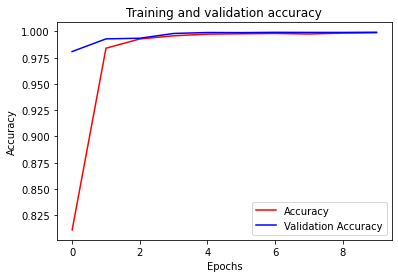

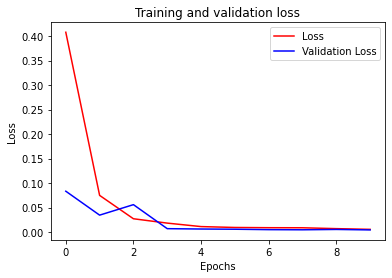

<Figure size 432x288 with 0 Axes>

In [36]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

  

In [41]:
    import pickle
    save_documents=open("./output",'wb')
    pickle.dump(model,save_documents)
    save_documents.close()

In [42]:
pred = model.predict_classes(test_x)
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      5969
    Not Fake       1.00      1.00      1.00      5256

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [57]:
lists= [""]
# model.predict(lists)
te = tokenizer.texts_to_sequences(lists)
te = pad_sequences(te,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [59]:

model.predict_classes(te)

array([[0]], dtype=int32)